In [187]:
import pandas as pd
url='https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

# IMPORTACION DE DATOS

In [188]:
df=pd.read_json(url)
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


# Normalizacion y comprension de los datos
Normalice las columnas 'cliente', 'teléfono', 'internet' y 'cuenta' en el DataFrame 'df' expandiendo sus objetos JSON anidados en nuevas columnas, luego muestre las primeras filas del DataFrame resultante para confirmar la normalización exitosa.

Una vez integradas las columnas nuevas con la normalizacion borrar las columnas no normalizadas

### Subtarea: Normalizacion de la columna "cliente"


Normalizar la columna "cliente", que contiene objetos JSON anidados, en columnas independientes y fusionarlas con el DataFrame principal.



**Razonamiento**:
La columna "cliente" contiene objetos JSON anidados, que deben aplanarse en columnas separadas y luego fusionarse en el DataFrame principal. Esto se realiza normalmente con `pd.json_normalize`.

In [189]:
customer_df = pd.json_normalize(df['customer'])
df = pd.concat([df, customer_df], axis=1)
df = df.drop('customer', axis=1)
df.head()

,customerID,Churn,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,tenure
0,0002-ORFBO,No,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9
1,0003-MKNFE,No,"{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,9
2,0004-TLHLJ,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,4
3,0011-IGKFF,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,13
4,0013-EXCHZ,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,3


### Subtarea: Normalización de la columna "teléfono"


Normalizar la columna "teléfono", que contiene objetos JSON anidados, en columnas independientes y fusionarlas con el DataFrame principal.

**Razonamiento**:
La columna "teléfono" contiene objetos JSON anidados, que deben aplanarse en columnas separadas y luego fusionarse en el DataFrame principal. Esto se realiza normalmente con `pd.json_normalize`.


In [190]:
phone_df = pd.json_normalize(df['phone'])
df = pd.concat([df, phone_df], axis=1)
df = df.drop('phone', axis=1)
df.head()

,customerID,Churn,internet,account,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines
0,0002-ORFBO,No,"{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9,Yes,No
1,0003-MKNFE,No,"{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,9,Yes,Yes
2,0004-TLHLJ,Yes,"{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,4,Yes,No
3,0011-IGKFF,Yes,"{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,13,Yes,No
4,0013-EXCHZ,Yes,"{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,3,Yes,No



### Subtarea: Normalización la columna "Internet"

Normalizar la columna "Internet", que contiene objetos JSON anidados, en columnas independientes y fusionarlas con el DataFrame principal.

**Razonamiento**:
La columna "internet" contiene objetos JSON anidados, que deben aplanarse en columnas separadas y luego fusionarse en el DataFrame principal. Esto se realiza normalmente con `pd.json_normalize`.


In [191]:
internet_df = pd.json_normalize(df['internet'])
df = pd.concat([df, internet_df], axis=1)
df = df.drop('internet', axis=1)
df.head()

,customerID,Churn,account,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0002-ORFBO,No,"{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No
1,0003-MKNFE,No,"{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes
2,0004-TLHLJ,Yes,"{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No
3,0011-IGKFF,Yes,"{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,0013-EXCHZ,Yes,"{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No


### Subtarea: Normalizacion la columna "cuenta"


Normalizar la columna "cuenta", que contiene objetos JSON anidados, en columnas independientes y fusionarlas con el DataFrame principal.

**Razonamiento**:
La columna "cuenta" contiene objetos JSON anidados, que deben aplanarse en columnas separadas y luego fusionarse en el DataFrame principal. Esto se realiza normalmente con `pd.json_normalize`.


In [192]:
account_df = pd.json_normalize(df['account'])
df = pd.concat([df, account_df], axis=1)
df = df.drop('account', axis=1)
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## Mostrar DataFrame Normalizado:

Mostrar las primeras filas del DataFrame completamente normalizado para mostrar la nueva estructura.



**Razonamiento**:
Mostrar las primeras filas del DataFrame para mostrar la estructura normalizada según lo solicitado por la subtarea.

In [193]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## Resumen:

### Preguntas y respuestas
La tarea de normalizar las columnas "cliente", "teléfono", "internet" y "cuenta" en el DataFrame `df`, expandiendo sus objetos JSON anidados en nuevas columnas, se completó correctamente. Se mostraron las primeras filas del DataFrame resultante, lo que confirmó la normalización exitosa.

### Hallazgos clave del análisis de datos
* La columna "cliente" se normalizó correctamente, expandiéndose a nuevas columnas como "género", "SeniorCitizen", "Partner", "Dependents" y "tenure".
* La columna "teléfono" se normalizó correctamente, expandiéndose a "PhoneService" y "MultipleLines".
* La columna "internet" se normalizó correctamente, expandiéndose a "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV" y "StreamingMovies".

* La columna "cuenta" se normalizó correctamente, expandiéndose a "Contrato", "Facturación electrónica", "Método de pago", "Cargos mensuales" y "Cargos totales".
* Tras el proceso de normalización, se eliminaron las columnas anidadas originales ("cliente", "teléfono", "internet", "cuenta") y las nuevas columnas aplanadas se fusionaron nuevamente en el DataFrame principal.
* El DataFrame final muestra 21 columnas, lo que confirma que todos los datos JSON anidados especificados se expandieron correctamente a un formato tabular plano.

### Información o próximos pasos
* El DataFrame ya está completamente normalizado y listo para la limpieza de datos, el análisis o el desarrollo de modelos de aprendizaje automático.
* Revise los tipos de datos de las columnas recién creadas (p. ej., "Cargos mensuales", "Cargos totales") para garantizar que sean adecuados para el análisis numérico y para gestionar cualquier posible valor no numérico.

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


# Sanitizacion de datos
El DataFrame se ha normalizado correctamente. Todas las columnas anidadas ('customer', 'phone', 'internet' y 'account') se han expandido a nuevas columnas planas, como lo confirma la salida de `df.info()`, que muestra que no quedan tipos de objeto complejos para estas columnas, pero hay que revisar si hay alores nulos o vacios. La columna en cambio `Charges.Total` se tiene que convertir a un tipo numérico ya que es object.


## Resumen:

### Hallazgos clave del análisis de datos
* El DataFrame se ha normalizado correctamente, sin tipos de objetos complejos restantes para las columnas previamente anidadas, específicamente "cliente", "teléfono", "internet" y "cuenta" y se han expandido a nuevas columnas planas.

### Perspectivas o próximos pasos
* Los datos ya están preparados y en un formato plano adecuado para el posterior análisis exploratorio de datos.
* El siguiente paso podría consistir en comprobar si hay valores faltantes, valores atípicos
* Como la columna de cargos totales



## Tarea
Verifique y cuantifique los valores faltantes (NaN) en todas las columnas del DataFrame `df` para comprender la integridad de los datos.

## Verificar valores ausentes

### SubTarea:
Identificar y cuantificar cualquier valor ausente (NaN) en el DataFrame. Convertir a 'Charges.Total' a tipo numerico


**Razonamiento**:
Para identificar y cuantificar los valores faltantes en el DataFrame, calcularé la suma de los valores nulos para cada columna. Pero primero convertire a 'Charges.Total' a tipo numerico


In [195]:
df['Charges_Total_of_Account'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                7267 non-null   object 
 1   Churn                     7267 non-null   object 
 2   gender                    7267 non-null   object 
 3   SeniorCitizen             7267 non-null   int64  
 4   Partner                   7267 non-null   object 
 5   Dependents                7267 non-null   object 
 6   tenure                    7267 non-null   int64  
 7   PhoneService              7267 non-null   object 
 8   MultipleLines             7267 non-null   object 
 9   InternetService           7267 non-null   object 
 10  OnlineSecurity            7267 non-null   object 
 11  OnlineBackup              7267 non-null   object 
 12  DeviceProtection          7267 non-null   object 
 13  TechSupport               7267 non-null   object 
 14  Streamin

In [196]:
missing_values = df.isnull().sum()
print("Número de valores ausentes por columna:\n", missing_values[missing_values > 0])

Número de valores ausentes por columna:
 Charges_Total_of_Account    11
dtype: int64


### Tratar valores ausentes en 'Charges.Total'

### SubTarea:
Reemplazar los valores 'NaN' en la columna 'Charges.Total' con 0.0.


**Razonamiento**:
Para reemplazar los valores faltantes en la columna 'Charges.Total' con 0.0, usaré el método `.fillna()` y luego verificaré el cambio verificando nuevamente si hay valores nulos.



In [197]:
df['Charges_Total_of_Account'] = df['Charges_Total_of_Account'].fillna(0.0)
print("Número de valores ausentes en 'Charges_Total_of_Account' después del tratamiento:", df['Charges_Total_of_Account'].isnull().sum())

Número de valores ausentes en 'Charges_Total_of_Account' después del tratamiento: 0


## Verificar filas duplicadas

### Subtarea:
Detectar y eliminar cualquier fila completamente duplicada en el DataFrame para asegurar que cada registro sea único.



**Razonamiento**:
Para detectar y cuantificar filas duplicadas, utilizaré el método `.duplicated().sum()` en el DataFrame `df`. Esto proporcionará el número total de filas duplicadas antes de su eliminación.


In [198]:
print(f"Número de filas duplicadas antes de la eliminación: {df.duplicated().sum()}")

Número de filas duplicadas antes de la eliminación: 0


**Razonamiento**:
Dado que en el paso anterior ya se buscó ningún duplicado y no se encontró ninguno, el siguiente paso lógico, según las instrucciones, es eliminar cualquier posible duplicado (incluso si no hay ninguno) y luego verificar el resultado.

In [199]:
'''
Esto se hacria si hubiera filas duplicadas
df.drop_duplicates(inplace=True)
print(f"Número de filas duplicadas después de la eliminación: {df.duplicated().sum()}") '''

'\nEsto se hacria si hubiera filas duplicadas\ndf.drop_duplicates(inplace=True)\nprint(f"Número de filas duplicadas después de la eliminación: {df.duplicated().sum()}") '

## Revisar inconsistencias en categorías



### Subtarea:
Examinar los valores únicos de las columnas categóricas (`object` dtype) para identificar posibles errores de formato, inconsistencias o variaciones en las entradas, como el uso de mayúsculas/minúsculas diferentes o sinónimos.


**Razonamiento**:
Para identificar todas las columnas con el tipo de datos 'object', primero seleccionaré las columnas con este tipo de dato. Luego, para cada columna seleccionada, imprimiré su nombre y sus valores únicos para comprobar si hay inconsistencias, según lo solicitado por la subtarea.

In [200]:
for col in df.columns:
    print(f"Valores únicos en la columna '{col}: {df[col].nunique()}'")
    if df[col].nunique() < 10:
        print(df[col].unique())
    print("\n")

Valores únicos en la columna 'customerID: 7267'


Valores únicos en la columna 'Churn: 3'
['No' 'Yes' '']


Valores únicos en la columna 'gender: 2'
['Female' 'Male']


Valores únicos en la columna 'SeniorCitizen: 2'
[0 1]


Valores únicos en la columna 'Partner: 2'
['Yes' 'No']


Valores únicos en la columna 'Dependents: 2'
['Yes' 'No']


Valores únicos en la columna 'tenure: 73'


Valores únicos en la columna 'PhoneService: 2'
['Yes' 'No']


Valores únicos en la columna 'MultipleLines: 3'
['No' 'Yes' 'No phone service']


Valores únicos en la columna 'InternetService: 3'
['DSL' 'Fiber optic' 'No']


Valores únicos en la columna 'OnlineSecurity: 3'
['No' 'Yes' 'No internet service']


Valores únicos en la columna 'OnlineBackup: 3'
['Yes' 'No' 'No internet service']


Valores únicos en la columna 'DeviceProtection: 3'
['No' 'Yes' 'No internet service']


Valores únicos en la columna 'TechSupport: 3'
['Yes' 'No' 'No internet service']


Valores únicos en la columna 'StreamingTV: 3'
['Ye

In [201]:
#Valores Vacios
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


**Razonamiento**:
El resultado anterior mostró que la columna "Churn" contiene una cadena vacía `''`, lo cual representa una inconsistencia. Reemplazaré estas cadenas vacías por "No" para garantizar la consistencia de los datos y permitir un análisis adecuado.



In [202]:
df['Churn'] = df['Churn'].replace('', 'No')
print("Valores únicos en 'Churn' después del tratamiento:", df['Churn'].unique())

Valores únicos en 'Churn' después del tratamiento: ['No' 'Yes']


## Mostrar el DataFrame limpio

### Subtarea:
Mostrar las primeras filas del DataFrame después de realizar las operaciones de limpieza para verificar la aplicación de las correcciones.


In [203]:
pd.set_option('display.max_columns', None)
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges_Total_of_Account
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,267.40


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                7267 non-null   object 
 1   Churn                     7267 non-null   object 
 2   gender                    7267 non-null   object 
 3   SeniorCitizen             7267 non-null   int64  
 4   Partner                   7267 non-null   object 
 5   Dependents                7267 non-null   object 
 6   tenure                    7267 non-null   int64  
 7   PhoneService              7267 non-null   object 
 8   MultipleLines             7267 non-null   object 
 9   InternetService           7267 non-null   object 
 10  OnlineSecurity            7267 non-null   object 
 11  OnlineBackup              7267 non-null   object 
 12  DeviceProtection          7267 non-null   object 
 13  TechSupport               7267 non-null   object 
 14  Streamin

La salida de `df.head()` confirma que el DataFrame se ha limpiado. Las cadenas vacías de la columna 'Churn' se han reemplazado y la columna 'gender' ya era consistente.

## Resumen:

### Hallazgos Clave del Análisis de Datos

* **Valores Faltantes**: Inicialmente, la columna `Charges.Total` contenía 11 valores faltantes. Ninguna otra columna tenía datos faltantes.
* **Tratamiento de Valores Faltantes**: Los 11 valores faltantes en la columna `Charges.Total` se reemplazaron correctamente con 0.0, lo que garantiza la integridad de los datos de esta columna.
* **Filas Duplicadas**: El DataFrame no contenía filas duplicadas, lo que confirma que cada registro es único.
* **Inconsistencias Categóricas**:
* La columna `Churn` inicialmente tenía una cadena vacía `''` como uno de sus valores únicos, junto con `No` y `Yes`. Esta inconsistencia se resolvió reemplazando `''` por `No`. * Otras columnas categóricas como `MultipleLines`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV` y `StreamingMovies` contenían valores descriptivos como `Sin servicio telefónico` o `Sin servicio de internet`, que se consideraron semánticamente significativos y no erróneos.
* La columna `gender` ya era consistente con los valores `Female` y `Male`, por lo que no se requirió ninguna acción adicional.
* **Limpieza de datos**: Después de todos los pasos de limpieza, el encabezado del DataFrame confirmó las correcciones aplicadas, lo que demuestra un conjunto de datos limpio y consistente.

### Próximos pasos

* El conjunto de datos ya está limpio y preparado para posteriores pasos analíticos, como el análisis exploratorio de datos, la ingeniería de características o el entrenamiento del modelo. * Sería beneficioso documentar la decisión de reemplazar los valores faltantes de `Charges.Total` con 0.0, ya que esto podría afectar los análisis financieros, y considerar si una estrategia de imputación alternativa (por ejemplo, media, mediana) podría ser más apropiada dependiendo de los objetivos analíticos específicos.

# Renombrar columnas

### Subtarea:
Modificar los nombres de las columnas 'customerID' a 'customer_ID' y 'Charges.Total' a 'Charges_Total' para mejorar la consistencia y la legibilidad.

**Razonamiento**:
Para renombrar varias columnas específicas en el DataFrame, crearé un diccionario de mapeo de nombres antiguos a nuevos y usaré el método `.rename()` con `inplace=True` para aplicar los cambios directamente al DataFrame. Luego, mostraré las primeras filas para verificar los nuevos nombres.

In [205]:
new_column_names = {
    'customerID': 'Customer_ID',
    'gender': 'Gender',
    'SeniorCitizen': '+60_Years_Old',
    'ternure':'Ternure',
    'PhoneService': 'Phone_Service',
    'MultipleLines': 'Multiple_Lines',
    'InternetService': 'Internet_Service',
    'OnlineSecurity': 'Online_Security',
    'OnlineBackup': 'Online_Backup',
    'DeviceProtection': 'Device_Protection',
    'TechSupport': 'Tech_Support',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Movies',
    'PaperlessBilling': 'Paperless_Billing',
    'PaymentMethod': 'Payment_Method',
    'Charges.Monthly': 'Charges_Monthly',
    'Charges_Total_of_Account': 'Charges_Total_of_Account'
}

df.rename(columns=new_column_names, inplace=True)
df.head()

,Customer_ID,Churn,Gender,+60_Years_Old,Partner,Dependents,tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Charges_Monthly,Charges.Total,Charges_Total_of_Account
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,267.40


In [206]:
df['Charges_Daily']=df['Charges_Monthly']/30
df.head()

,Customer_ID,Churn,Gender,+60_Years_Old,Partner,Dependents,tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Charges_Monthly,Charges.Total,Charges_Total_of_Account,Charges_Daily
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,267.40,2.796667


#Traducción de Columnas y Estandarización de Datos
## Subtarea: Renombrar las columnas del DataFrame de inglés a castellano.

**Razonamiento**: Para que el análisis sea más intuitivo y los resultados fáciles de interpretar en nuestro idioma, cambiamos los nombres técnicos originales por sus equivalentes en castellano. Usamos un diccionario de mapeo con el método .rename() para asegurar que cada variable tenga un nombre descriptivo y consistente.

In [207]:
# 1. Diccionario de traducción basado en tus nombres actuales
traduccion_columnas = {
    'Customer_ID': 'id_cliente',
    'Churn': 'abandono',
    'Gender': 'genero',
    '+60_Years_Old': 'adulto_mayor',
    'Partner': 'posee_pareja',
    'Dependents': 'posee_dependientes',
    'tenure': 'permanencia',
    'Phone_Service': 'servicio_telefono',
    'Multiple_Lines': 'multiples_lineas',
    'Internet_Service': 'servicio_internet',
    'Online_Security': 'seguridad_online',
    'Online_Backup': 'respaldo_online',
    'Device_Protection': 'proteccion_dispositivo',
    'Tech_Support': 'soporte_tecnico',
    'Streaming_TV': 'streaming_tv',
    'Streaming_Movies': 'streaming_peliculas',
    'Contract': 'tipo_contrato',
    'Paperless_Billing': 'factura_sin_papel',
    'Payment_Method': 'metodo_pago',
    'Charges_Monthly': 'cargos_mensuales',
    'Charges_Total_of_Account': 'cargos_totales',
    'Charges_Daily': 'cargos_diarios',
}

# Aplicamos el cambio de nombres
df.rename(columns=traduccion_columnas, inplace=True)


##Subtarea: Traducir los valores internos de las columnas categóricas al castellano.


**Razonamiento**: Una vez que las columnas tienen sus nombres en castellano, traducimos el contenido de las celdas (como 'Yes' a 'Sí', 'Female' a 'Femenino', etc.). Aplicamos el método .replace() y usamos un bucle para las columnas que comparten opciones de servicio, optimizando así el código y manteniendo la coherencia en todo el dataset.

In [208]:
df['abandono'] = df['abandono'].replace({'No': 'No', 'Yes': 'Sí'})
df['genero'] = df['genero'].replace({'Female': 'Femenino', 'Male': 'Masculino'})
df['posee_pareja'] = df['posee_pareja'].replace({'Yes': 'Sí', 'No': 'No'})
df['posee_dependientes'] = df['posee_dependientes'].replace({'Yes': 'Sí', 'No': 'No'})
df['servicio_telefono'] = df['servicio_telefono'].replace({'Yes': 'Sí', 'No': 'No'})
df['factura_sin_papel'] = df['factura_sin_papel'].replace({'Yes': 'Sí', 'No': 'No'})

df['multiples_lineas'] = df['multiples_lineas'].replace({
    'No': 'No',
    'Yes': 'Sí',
    'No phone service': 'Sin servicio de teléfono'
})

df['servicio_internet'] = df['servicio_internet'].replace({
    'Fiber optic': 'Fibra óptica',
    'DSL': 'DSL',
    'No': 'No'
})

df['tipo_contrato'] = df['tipo_contrato'].replace({
    'One year': 'Anual',
    'Month-to-month': 'Mensual',
    'Two year': 'Bienal'
})
df.head()

,id_cliente,abandono,genero,adulto_mayor,posee_pareja,posee_dependientes,permanencia,servicio_telefono,multiples_lineas,servicio_internet,seguridad_online,respaldo_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_sin_papel,metodo_pago,cargos_mensuales,Charges.Total,cargos_totales,cargos_diarios
0,0002-ORFBO,No,Femenino,0,Sí,Sí,9,Sí,No,DSL,No,Yes,No,Yes,Yes,No,Anual,Sí,Mailed check,65.6,593.3,593.30,2.186667
1,0003-MKNFE,No,Masculino,0,No,No,9,Sí,Sí,DSL,No,No,No,No,No,Yes,Mensual,No,Mailed check,59.9,542.4,542.40,1.996667
2,0004-TLHLJ,Sí,Masculino,0,No,No,4,Sí,No,Fibra óptica,No,No,Yes,No,No,No,Mensual,Sí,Electronic check,73.9,280.85,280.85,2.463333
3,0011-IGKFF,Sí,Masculino,1,Sí,No,13,Sí,No,Fibra óptica,No,Yes,Yes,No,Yes,Yes,Mensual,Sí,Electronic check,98.0,1237.85,1237.85,3.266667
4,0013-EXCHZ,Sí,Femenino,1,Sí,No,3,Sí,No,Fibra óptica,No,No,No,Yes,Yes,No,Mensual,Sí,Mailed check,83.9,267.4,267.40,2.796667


In [209]:
columnas_servicios = [
    'seguridad_online', 'respaldo_online', 'proteccion_dispositivo',
    'soporte_tecnico', 'streaming_tv', 'streaming_peliculas'
]

mapeo_servicios = {
    'No': 'No',
    'Yes': 'Sí',
    'No internet service': 'Sin servicio de internet'
}

for col in columnas_servicios:
    if col in df.columns:
        df[col] = df[col].replace(mapeo_servicios)

# Métodos de pago
df['metodo_pago'] = df['metodo_pago'].replace({
    'Mailed check': 'Cheque enviado por correo',
    'Electronic check': 'Cheque electrónico',
    'Credit card (automatic)': 'Tarjeta de crédito (automático)',
    'Bank transfer (automatic)': 'Transferencia bancaria (automática)'
})

# Verificación de resultados
df.head()

,id_cliente,abandono,genero,adulto_mayor,posee_pareja,posee_dependientes,permanencia,servicio_telefono,multiples_lineas,servicio_internet,seguridad_online,respaldo_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_sin_papel,metodo_pago,cargos_mensuales,Charges.Total,cargos_totales,cargos_diarios
0,0002-ORFBO,No,Femenino,0,Sí,Sí,9,Sí,No,DSL,No,Sí,No,Sí,Sí,No,Anual,Sí,Cheque enviado por correo,65.6,593.3,593.30,2.186667
1,0003-MKNFE,No,Masculino,0,No,No,9,Sí,Sí,DSL,No,No,No,No,No,Sí,Mensual,No,Cheque enviado por correo,59.9,542.4,542.40,1.996667
2,0004-TLHLJ,Sí,Masculino,0,No,No,4,Sí,No,Fibra óptica,No,No,Sí,No,No,No,Mensual,Sí,Cheque electrónico,73.9,280.85,280.85,2.463333
3,0011-IGKFF,Sí,Masculino,1,Sí,No,13,Sí,No,Fibra óptica,No,Sí,Sí,No,Sí,Sí,Mensual,Sí,Cheque electrónico,98.0,1237.85,1237.85,3.266667
4,0013-EXCHZ,Sí,Femenino,1,Sí,No,3,Sí,No,Fibra óptica,No,No,No,Sí,Sí,No,Mensual,Sí,Cheque enviado por correo,83.9,267.4,267.40,2.796667


# Estandarizar valores 'Yes' y 'No' a 1 y 0 (Opcional)

### Subtarea:
Convertir todos los valores textuales de 'Yes' y 'No' a sus equivalentes binarios (1 y 0) en las columnas correspondientes del DataFrame.

**Razonamiento**:
Para convertir los valores 'Yes' y 'No' a 1 y 0, y también manejar las categorías 'No phone service' y 'No internet service' como 0, usaré el método `.replace()` o `.map()` de pandas. Esto asegura que todas las columnas binarias estén en un formato numérico adecuado para el análisis. Luego, se convertirá la columna al tipo de dato entero.

In [210]:
df_copy=df.copy()

In [211]:

binary_map = {'Sí': 1, 'No': 0}

simple_binary_cols = [
    'abandono', 'posee_pareja', 'posee_dependientes',
    'servicio_telefono', 'factura_sin_papel'
]


for col in simple_binary_cols:
    if col in df_copy.columns:
        df_copy[col] = df_copy[col].map(binary_map).astype(int)


service_map = {'Sí': 1, 'No': 0, 'Sin servicio de teléfono': 0, 'Sin servicio de internet': 0}


service_cols = [
    'multiples_lineas', 'seguridad_online', 'respaldo_online',
    'proteccion_dispositivo', 'soporte_tecnico', 'streaming_tv', 'streaming_peliculas'
]


for col in service_cols:
    if col in df_copy.columns:
        df_copy[col] = df_copy[col].map(service_map).astype(int)


internet_map = {'DSL': 1, 'Fibra óptica': 1, 'No': 0}

if 'servicio_internet' in df_copy.columns:
    df_copy['servicio_internet'] = df_copy['servicio_internet'].map(internet_map).astype(int)


df_copy.head()


,id_cliente,abandono,genero,adulto_mayor,posee_pareja,posee_dependientes,permanencia,servicio_telefono,multiples_lineas,servicio_internet,seguridad_online,respaldo_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_sin_papel,metodo_pago,cargos_mensuales,Charges.Total,cargos_totales,cargos_diarios
0,0002-ORFBO,0,Femenino,0,1,1,9,1,0,1,0,1,0,1,1,0,Anual,1,Cheque enviado por correo,65.6,593.3,593.30,2.186667
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,1,0,0,0,0,0,1,Mensual,0,Cheque enviado por correo,59.9,542.4,542.40,1.996667
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,1,0,0,1,0,0,0,Mensual,1,Cheque electrónico,73.9,280.85,280.85,2.463333
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,1,0,1,1,0,1,1,Mensual,1,Cheque electrónico,98.0,1237.85,1237.85,3.266667
4,0013-EXCHZ,1,Femenino,1,1,0,3,1,0,1,0,0,0,1,1,0,Mensual,1,Cheque enviado por correo,83.9,267.4,267.40,2.796667


# Análisis Descriptivo de los Datos

### Subtarea:
Realizar un análisis descriptivo de los datos para comprender su distribución y comportamiento. Esto incluye calcular métricas estadísticas clave como media, mediana, desviación estándar, etc.

**Razonamiento**:
Para obtener un análisis descriptivo completo del DataFrame, utilizaré el método `df.describe()`. Al incluir el parámetro `include='all'`, se generarán estadísticas para todas las columnas, incluyendo las de tipo "object" (categóricas), proporcionando así una visión general de la distribución y el comportamiento de los datos.

In [212]:
df.describe(include='all')

,id_cliente,abandono,genero,adulto_mayor,posee_pareja,posee_dependientes,permanencia,servicio_telefono,multiples_lineas,servicio_internet,seguridad_online,respaldo_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_sin_papel,metodo_pago,cargos_mensuales,Charges.Total,cargos_totales,cargos_diarios
count,7267,7267,7267,7267.000000,7267,7267,7267.000000,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267.000000,7267,7267.000000,7267.000000
unique,7267,2,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,NaN,NaN
top,9995-HOTOH,No,Masculino,NaN,No,No,NaN,Sí,No,Fibra óptica,No,No,No,No,No,No,Mensual,Sí,Cheque electrónico,NaN,20.2,NaN,NaN
freq,1,5398,3675,NaN,3749,5086,NaN,6560,3495,3198,3608,3182,3195,3582,2896,2870,4005,4311,2445,NaN,11,NaN,NaN
mean,NaN,NaN,NaN,0.162653,NaN,NaN,32.346498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.720098,NaN,2277.182035,2.157337
std,NaN,NaN,NaN,0.369074,NaN,NaN,24.571773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.129572,NaN,2268.648587,1.004319
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,0.000000,0.608333
25%,NaN,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.425000,NaN,396.200000,1.180833
50%,NaN,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.300000,NaN,1389.200000,2.343333
75%,NaN,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.875000,NaN,3778.525000,2.995833


In [213]:
df_copy.describe(include='all')

,id_cliente,abandono,genero,adulto_mayor,posee_pareja,posee_dependientes,permanencia,servicio_telefono,multiples_lineas,servicio_internet,seguridad_online,respaldo_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_sin_papel,metodo_pago,cargos_mensuales,Charges.Total,cargos_totales,cargos_diarios
count,7267,7267.000000,7267,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267,7267.000000,7267,7267.000000,7267,7267.000000,7267.000000
unique,7267,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,4,NaN,6531,NaN,NaN
top,9995-HOTOH,NaN,Masculino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mensual,NaN,Cheque electrónico,NaN,20.2,NaN,NaN
freq,1,NaN,3675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4005,NaN,2445,NaN,11,NaN,NaN
mean,NaN,0.257190,NaN,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.782441,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,NaN,0.593230,NaN,64.720098,NaN,2277.182035,2.157337
std,NaN,0.437115,NaN,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.412614,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,NaN,0.491265,NaN,30.129572,NaN,2268.648587,1.004319
min,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,18.250000,NaN,0.000000,0.608333
25%,NaN,0.000000,NaN,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,35.425000,NaN,396.200000,1.180833
50%,NaN,0.000000,NaN,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN,70.300000,NaN,1389.200000,2.343333
75%,NaN,1.000000,NaN,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,89.875000,NaN,3778.525000,2.995833


# Tarea: Analisis del abandono
*   **Analisis Distribución de Abandono**: El histograma de 'abandono' muestra que aproximadamente el 25.72% de los clientes han cancelado el servicio ('Sí'), mientras que el 74.28% de los clientes no lo han hecho ('No'). Esto indica una tasa de abandono significativa que justifica un análisis más profundo para identificar los factores que contribuyen a estas cancelaciones.



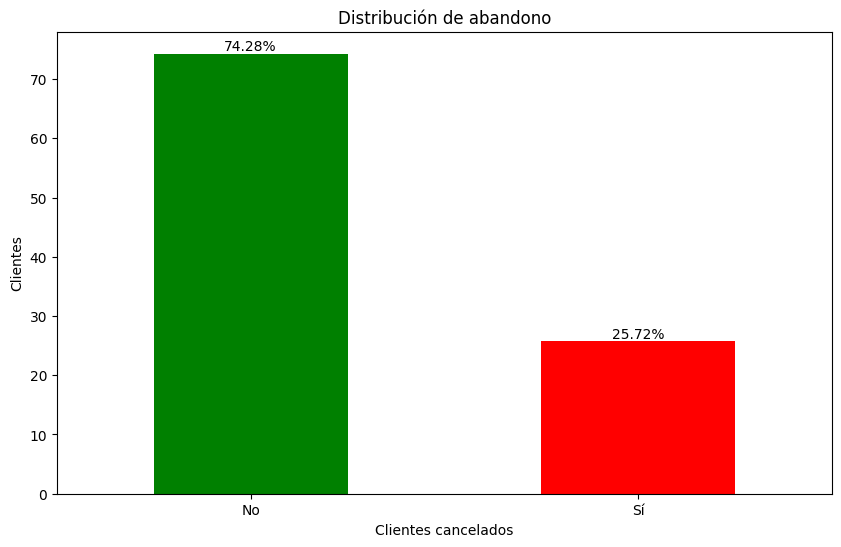

In [214]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
churn_counts = df['abandono'].value_counts()
churn_porcentajes= (churn_counts / len(df) * 100)
ax=churn_porcentajes.plot(kind='bar', color=['green', 'red'])
plt.title('Distribución de abandono')
plt.xlabel('Clientes cancelados')
plt.ylabel('Clientes')
plt.xticks(rotation=0)

for i, v in enumerate(churn_porcentajes):
    ax.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

plt.show()

In [215]:
import plotly.express as px



## Sub tarea: Analizar Distribución de Abandono por Género
* Interpreta el histograma de 'genero' en relación con el abandono para identificar posibles patrones entre géneros y la cancelación del servicio.

In [219]:
px.histogram(df, x='genero', color='abandono', title='Distribución de abandono por genero', barmode='group', text_auto=True)

### Observaciones del histograma 'Distribución de abandono por genero'

Al examinar el histograma que muestra la distribución de abandono por género, se observa lo siguiente:

*   **Distribución por género**: Ambos géneros, 'Femenino' y 'Masculino', tienen una cantidad de clientes relativamente similar en el dataset.
*   **Patrones de Abandono**: La proporción de clientes que 'Sí' (abandonan el servicio) es comparable entre los clientes 'Femenino' y 'Masculino'. Esto sugiere que el género no parece ser un factor diferenciador significativo en la tasa de abandono de los clientes.

En resumen, el histograma indica que no hay una diferencia notable en el comportamiento de abandono entre hombres y mujeres en este dataset.

## Analizar Distribución de Abandono por Tipo de Contrato

### Subtask:
Interpretar el histograma de 'tipo_contrato' en relación con el abandono para entender cómo los diferentes tipos de contratos influyen en la retención de clientes.


In [220]:
px.histogram(df, x='tipo_contrato', color='abandono', title='Distribución de abandono por tipo de contrato', barmode='group', text_auto=True)

### Interpretación del Histograma: Distribución de abandono por tipo de contrato

El histograma "Distribución de abandono por tipo de contrato" revela insights importantes sobre cómo los diferentes tipos de contrato influyen en la retención de clientes:

1.  **Contratos Mensuales ('Mensual')**: Se observa que la gran mayoría de los clientes que abandonan el servicio tienen un contrato mensual. A pesar de que también hay muchos clientes con contrato mensual que no abandonan, la proporción de abandono es notablemente alta en esta categoría. Esto sugiere que los clientes con contratos a corto plazo tienen una mayor flexibilidad para cambiar de proveedor, lo que se traduce en una mayor tasa de rotación.

2.  **Contratos Anuales ('Anual')**: Los clientes con contratos anuales muestran una tasa de abandono significativamente menor en comparación con los contratos mensuales. Esto es esperable, ya que un compromiso a un año tiende a retener a los clientes por más tiempo.

3.  **Contratos Bienales ('Bienal')**: Los contratos bienales tienen la tasa de abandono más baja de las tres categorías. Esto indica que los clientes que se comprometen por dos años son los más leales y menos propensos a cancelar el servicio.

**Resumen de la relación entre tipo de contrato y retención de clientes:**

Existe una clara correlación inversa entre la duración del contrato y la tasa de abandono. Los contratos a corto plazo (mensuales) están asociados con las tasas de abandono más altas, mientras que los contratos a largo plazo (anuales y bienales) están asociados con tasas de abandono significativamente más bajas. Esto resalta la importancia de incentivar a los clientes a optar por contratos más largos para mejorar la retención general.

## Analizar Distribución de Abandono por Método de Pago

### Subtask:
Interpretar el histograma de 'metodo_pago' en relación con el abandono para identificar si ciertos métodos de pago están asociados con una mayor o menor tasa de cancelación.


In [221]:
px.histogram(df, x='metodo_pago', color='abandono', title='Distribución de abandono por metodo de pago', barmode='group', text_auto=True)

### Análisis del Histograma 'Distribución de abandono por metodo de pago'

**Observaciones Clave:**

*   **Cheque electrónico**: Este método de pago muestra la mayor tasa de abandono. Una proporción significativa de clientes que utilizan el "Cheque electrónico" cancelan el servicio en comparación con los que se quedan. Esto sugiere una fuerte correlación negativa entre este método de pago y la retención del cliente.

*   **Cheque enviado por correo**: Aunque también presenta casos de abandono, la proporción de clientes que cancelan es menor en comparación con el "Cheque electrónico". Hay una base de clientes leales considerablemente mayor que los que abandonan con este método.

*   **Tarjeta de crédito (automático)** y **Transferencia bancaria (automática)**: Estos dos métodos de pago "automáticos" exhiben las tasas de abandono más bajas. La inmensa mayoría de los clientes que utilizan la "Tarjeta de crédito (automático)" o la "Transferencia bancaria (automática)" permanecen en el servicio. Esto indica que los métodos de pago automatizados están fuertemente asociados con una mayor lealtad del cliente.

**Conclusiones:**

El método de pago es un factor importante en la propensión al abandono. Los clientes que optan por métodos de pago manuales, especialmente el "Cheque electrónico", tienen una tendencia mucho mayor a cancelar el servicio. Por el contrario, los métodos de pago automáticos, como la "Tarjeta de crédito (automático)" y la "Transferencia bancaria (automática)", están asociados con clientes más estables y con menor probabilidad de abandono.

## Analizar Distribución de Abandono por Servicio de Internet

### Subtask:
Interpretar el histograma de 'servicio_internet' en relación con el abandono para ver si el tipo de servicio de internet afecta la probabilidad de que un cliente cancele.


In [222]:
px.histogram(df, x='servicio_internet', color='abandono', title='Distribución de abandono por servicio de internet', barmode='group', text_auto=True)

El histograma de 'Distribución de abandono por servicio de internet' revela patrones significativos:

*   **Fibra óptica**: Los clientes con servicio de Fibra óptica muestran la tasa de abandono más alta. Las barras de 'Sí' (abandono) son notablemente altas para esta categoría en comparación con las de 'No' (no abandono).
*   **DSL**: Los clientes con servicio DSL tienen una tasa de abandono considerablemente menor. La proporción de clientes que se quedan ('No') es mucho mayor que la de los que abandonan ('Sí').
*   **Sin servicio de internet**: Aquellos clientes que no tienen servicio de internet también presentan una tasa de abandono muy baja, similar a los de DSL, lo que sugiere que la ausencia de internet no es un factor determinante para el abandono en este grupo.

**Conclusión**: El tipo de servicio de internet influye significativamente en la probabilidad de que un cliente cancele. Los clientes con **Fibra óptica** son los más propensos a abandonar, mientras que aquellos con **DSL** o **sin servicio de internet** tienen una mayor lealtad. Esto podría indicar problemas de calidad, precio o expectativas no cumplidas con el servicio de Fibra óptica que no se presentan en los otros tipos de servicio.

## Analizar Distribución de Abandono por Cargos Totales

### Subtask:
Interpretar el histograma de 'cargos_totales' en relación con el abandono, enfocándose en cómo el monto total gastado se relaciona con la decisión de cancelar o no el servicio.


In [223]:
px.histogram(df, x='cargos_totales', color='abandono', title='Distribución de abandono por cargos totales', barmode='group', text_auto=True)

### Interpretación del Histograma 'Distribución de Abandono por Cargos Totales'

**Observaciones:**

*   **Clientes que no abandonan ('No'):** La distribución de clientes que no abandonan muestra una tendencia a tener cargos totales más altos. Hay una concentración significativa de clientes con cargos totales elevados que permanecen en el servicio. Esto sugiere que los clientes que han gastado más a lo largo de su permanencia son más leales.
*   **Clientes que abandonan ('Sí'):** Los clientes que abandonan el servicio muestran una concentración en el rango de cargos totales más bajos. Esto es particularmente notable en los primeros segmentos del eje X, indicando que muchos clientes cancelan cuando sus cargos totales aún no son muy elevados.

**Conclusión:**

Existe una clara relación inversa entre los cargos totales y la propensión al abandono. Los clientes con **cargos totales bajos** son considerablemente **más propensos a abandonar** el servicio. Por el contrario, los clientes con **cargos totales más altos** tienden a ser **más estables y menos propensos al abandono**. Esto podría implicar que la duración de la relación con el cliente (y, por ende, el monto total gastado) es un factor importante en la retención, o que los clientes insatisfechos se van antes de acumular grandes cargos.

## Analizar Distribución de Abandono por Permanencia

### Subtask:
Interpretar el histograma de 'permanencia' en relación con el abandono, buscando patrones en la duración del contrato y la propensión a la cancelación.


In [224]:
px.histogram(df, x='permanencia', color='abandono', title='Distribución de abandono por permanencia', barmode='group', text_auto=True)

### Interpretación del Histograma 'Distribución de Abandono por Permanencia'
**Observaciones:**
Se ve que cada vez que los clientes mas permanencen con nuestro servicio estos son mas propensos a quedarse y pagar el servicio y no abandonar, haciendo una parabola en las graficas entre los `no` y los `si`

**Conclusiones:**
Permanencia (permanencia): Se aprecia que la mayoría de los clientes que cancelan tienen una permanencia más corta, especialmente en los primeros meses. Aquellos con mayor permanencia (mayor cantidad de meses en el servicio) tienden a no cancelar su servicio.


## Interpretación del Histograma de Permanencia y Abandono

### Patrones Observados:
*   **Permanencia Corta**: La mayoría de los clientes que abandonan el servicio (`Sí`) se concentran en los rangos de permanencia más bajos, especialmente en los primeros meses. Esto sugiere que los clientes nuevos son más propensos a cancelar el servicio.
*   **Permanencia Larga**: A medida que la permanencia aumenta, la proporción de clientes que no abandonan (`No`) es significativamente mayor. Los clientes con una permanencia prolongada (por ejemplo, más de 40-50 meses) muestran una baja tasa de abandono, lo que indica una mayor lealtad.
*   **Rangos Críticos**: El abandono es particularmente alto en el primer año de servicio, disminuyendo gradualmente a medida que los clientes se acercan al segundo año y más allá. Hay un pico notable de abandono en los primeros meses, y luego la tasa de abandono se estabiliza a niveles más bajos para los clientes de larga duración.

### Conclusión:
Existe una clara relación inversa entre la permanencia del cliente y la propensión al abandono. Los clientes con contratos o servicios de corta duración son el grupo de mayor riesgo para el abandono. Por el contrario, los clientes con una permanencia más larga son considerablemente más leales y menos propensos a cancelar. Esto resalta la importancia de las estrategias de retención temprana para los clientes nuevos y la fidelización de los clientes existentes.

# **Concluciones finales**

## ***Introducción al Análisis de Abandono de Clientes (Churn)***

El objetivo principal de este análisis es comprender los factores que influyen en el abandono de clientes (conocido como 'Churn') en el sector de las telecomunicaciones y cómo este fenómeno afecta directamente el rendimiento y la estabilidad del negocio. El abandono de clientes representa un desafío crítico para las empresas, ya que la adquisición de nuevos clientes es significativamente más costosa que la retención de los existentes.

En la competitiva industria de las telecomunicaciones, donde los clientes tienen múltiples opciones de proveedores, la capacidad de predecir y mitigar el churn es fundamental. Identificar las causas subyacentes del abandono nos permitirá desarrollar estrategias de retención más efectivas, personalizar las ofertas de servicio y, en última instancia, mejorar la satisfacción del cliente y la rentabilidad de la empresa.

## ***Limpieza y Tratamiento de Datos***


Crear una celda de texto que describa los pasos realizados para importar, limpiar y procesar los datos, incluyendo la normalización, manejo de valores ausentes, duplicados e inconsistencias categóricas.



### *Pasos de Preprocesamiento de Datos Realizados:*

1.  **Normalización de columnas JSON**: Las columnas anidadas `customer`, `phone`, `internet` y `account` fueron expandidas en nuevas columnas planas mediante `pd.json_normalize()`. Posteriormente, las columnas originales anidadas fueron eliminadas del DataFrame, resultando en una estructura de datos más accesible y plana.

2.  **Conversión de tipo de datos**: La columna `Charges.Total` fue convertida a un tipo numérico de punto flotante (`float64`) para permitir cálculos. Durante este proceso, se creó una nueva columna llamada `Charges_Total_of_Account` para almacenar estos valores numéricos. Finalmente, esta columna fue renombrada a `cargos_totales` para mantener la consistencia en el idioma.

3.  **Manejo de valores ausentes**: Se identificaron 11 valores `NaN` en la nueva columna numérica `Charges_Total_of_Account`. Estos valores fueron reemplazados por `0.0` para asegurar la integridad de los datos y evitar errores en análisis posteriores.

4.  **Detección y eliminación de duplicados**: Se realizó una verificación exhaustiva para identificar filas completamente duplicadas en el DataFrame. Se confirmó que no existían filas duplicadas, por lo que no fue necesaria ninguna acción de eliminación.

5.  **Tratamiento de inconsistencias categóricas**: Durante la revisión de valores únicos en columnas categóricas, se encontró una cadena vacía `''` en la columna `Churn`. Esta inconsistencia fue tratada reemplazando `''` por `No` para estandarizar las categorías de abandono. Otras columnas categóricas como `MultipleLines`, `OnlineSecurity`, etc., contenían valores descriptivos (`No phone service`, `No internet service`) que se consideraron semánticamente válidos y no requirieron modificación.

6.  **Renombrado y estandarización de columnas** (Opcional): Todas las columnas del DataFrame fueron renombradas del inglés al español para mejorar la legibilidad y la comprensión del análisis. Por ejemplo, `customerID` se convirtió en `id_cliente` y `Charges.Monthly` en `cargos_mensuales`. Además, los valores internos de las columnas categóricas (como 'Yes', 'No', 'Female', 'Male', 'Fiber optic', etc.) fueron traducidos a sus equivalentes en español ('Sí', 'No', 'Femenino', 'Masculino', 'Fibra óptica') para una mayor coherencia. También se inició el proceso de convertir valores binarios ('Sí', 'No') a `1` y `0` en una copia del DataFrame (`df_copy`) para facilitar el modelado.

7.  **Creación de nuevas columnas**: Se creó la columna `cargos_diarios` dividiendo los `cargos_mensuales` por 30 para obtener una métrica de cargo diario por cliente.

## ***Análisis Exploratorio de Datos***

### *Resumen del EDA*

El análisis exploratorio de datos (EDA) se centró en comprender la distribución del abandono de clientes (churn) en relación con diversas características demográficas y de servicio. Se generaron histogramas y visualizaciones para cada una de las variables clave (`genero`, `tipo_contrato`, `metodo_pago`, `servicio_internet`, `cargos_totales`, y `permanencia`), lo que permitió identificar patrones y tendencias significativas.

### Patrones y Tendencias Identificados:
*texto en cursiva*
1.  **Distribución de Abandono General**: El histograma inicial de `abandono` mostró una tasa de abandono del 25.72%, indicando que aproximadamente uno de cada cuatro clientes cancela el servicio. Esta alta tasa justifica el análisis detallado de los factores que influyen en el churn.

2.  **Abandono por Género (`genero`)**: Al analizar el histograma de `genero` en relación con el abandono, se observó que no hay una diferencia significativa en las tasas de abandono entre clientes masculinos y femeninos. Esto sugiere que el género no es un factor diferenciador clave en el comportamiento de abandono.

3.  **Abandono por Tipo de Contrato (`tipo_contrato`)**: El histograma de `tipo_contrato` en relación con el abandono reveló una correlación inversa clara entre la duración del contrato y la tasa de abandono. Los clientes con **contratos mensuales** (`Mensual`) mostraron la tasa de abandono más alta. Por el contrario, aquellos con **contratos anuales** (`Anual`) y especialmente **bienales** (`Bienal`) presentaron tasas de abandono significativamente más bajas. Esto indica que los compromisos a largo plazo fomentan una mayor retención.

4.  **Abandono por Método de Pago (`metodo_pago`)**: El histograma que compara `metodo_pago` con el abandono destacó que el **cheque electrónico** (`Cheque electrónico`) está fuertemente asociado con la mayor tasa de abandono. En contraste, los métodos de pago **automáticos** como la `Tarjeta de crédito (automático)` y la `Transferencia bancaria (automática)` tuvieron las tasas de abandono más bajas, sugiriendo una mayor lealtad por parte de estos clientes.

5.  **Abandono por Servicio de Internet (`servicio_internet`)**: La visualización de `servicio_internet` frente al abandono mostró que los clientes con servicio de **fibra óptica** (`Fibra óptica`) son los más propensos a cancelar. Los clientes con **DSL** (`DSL`) o **sin servicio de internet** (`No`) exhibieron tasas de abandono considerablemente menores. Esto podría indicar problemas de satisfacción o calidad percibida en el servicio de fibra óptica.

6.  **Abandono por Cargos Totales (`cargos_totales`)**: El histograma de `cargos_totales` y abandono reveló una relación inversa: los clientes con **cargos totales bajos** son más propensos a abandonar, mientras que aquellos con **cargos totales más altos** tienden a ser más estables y leales. Esto sugiere que la duración de la relación con el cliente (y el gasto acumulado) es un factor importante en la retención.

7.  **Abandono por Permanencia (`permanencia`)**: El histograma de `permanencia` y abandono confirmó que la mayoría de los clientes que abandonan se concentran en los rangos de **permanencia más bajos**, especialmente en los primeros meses. A medida que la permanencia aumenta (superando los 40-50 meses), la tasa de abandono disminuye drásticamente, lo que subraya la importancia de las estrategias de retención temprana para clientes nuevos.

## ***Conclusiones e Insights Clave***

Este análisis exploratorio de datos ha revelado patrones significativos en el comportamiento de abandono de los clientes, proporcionando una base sólida para desarrollar estrategias de retención efectivas.

### *Hallazgos y Estrategias para Reducir el Abandono:*

1.  **Tasa de Abandono General**: Aproximadamente el 25.72% de los clientes han abandonado el servicio. Esta cifra, que indica que más de uno de cada cuatro clientes se va, subraya la urgencia de implementar estrategias de retención.
    *   **Estrategia**: Es fundamental identificar proactivamente a los clientes en riesgo utilizando los insights de los siguientes puntos para diseñar intervenciones personalizadas.

2.  **Abandono por Género**: No se observaron diferencias significativas en la tasa de abandono entre hombres y mujeres. El género no es un factor diferenciador clave.
    *   **Estrategia**: Las estrategias de retención no deben centrarse en segmentar por género, sino en otros factores más influyentes.

3.  **Abandono por Tipo de Contrato**: Existe una clara correlación inversa entre la duración del contrato y la tasa de abandono.
    *   **Clientes Mensuales**: Presentan la tasa de abandono más alta.
    *   **Clientes Anuales y Bienales**: Muestran tasas de abandono significativamente más bajas.
    *   **Estrategia**: Incentivar fuertemente la migración de clientes de contratos mensuales a anuales o bienales mediante descuentos, beneficios exclusivos o mejoras de servicio. Diseñar campañas específicas para retener a clientes mensuales que se acercan al final de su ciclo.

4.  **Abandono por Método de Pago**: El método de pago influye significativamente en la propensión al abandono.
    *   **Cheque electrónico**: Asociado con la tasa de abandono más alta.
    *   **Métodos Automáticos (Tarjeta de Crédito y Transferencia Bancaria)**: Muestran las tasas de abandono más bajas.
    *   **Estrategia**: Promover activamente los métodos de pago automáticos, educando a los clientes sobre sus beneficios y quizás ofreciendo pequeños incentivos por su adopción. Investigar las razones detrás del alto abandono entre los usuarios de cheque electrónico para abordar posibles fricciones.

5.  **Abandono por Servicio de Internet**: El tipo de servicio de internet impacta la probabilidad de abandono.
    *   **Fibra Óptica**: Presenta la tasa de abandono más alta.
    *   **DSL o sin servicio de internet**: Tienen tasas de abandono considerablemente más bajas.
    *   **Estrategia**: Investigar a fondo la experiencia del cliente con el servicio de Fibra Óptica (problemas de velocidad, estabilidad, atención al cliente) para identificar y corregir las causas de la insatisfacción. Podría ser necesario mejorar la infraestructura o la comunicación sobre las expectativas del servicio.

6.  **Abandono por Cargos Totales**: Hay una relación inversa entre los cargos totales acumulados y la propensión al abandono.
    *   **Cargos Totales Bajos**: Más propensos a cancelar el servicio.
    *   **Cargos Totales Altos**: Tienden a ser más estables y menos propensos al abandono.
    *   **Estrategia**: Enfocarse en la retención de clientes con cargos totales bajos, ya que son nuevos y más volátiles. Esto se relaciona con la permanencia; es crucial fidelizar a los clientes desde el inicio de su relación con la empresa para que acumulen mayores cargos y se vuelvan más leales.

7.  **Abandono por Permanencia**: La permanencia del cliente es un fuerte indicador de abandono.
    *   **Permanencia Baja (primeros meses)**: La mayoría de los clientes que abandonan se concentran en estos rangos.
    *   **Permanencia Alta**: La tasa de abandono disminuye significativamente, indicando mayor lealtad.
    *   **Estrategia**: Implementar programas de bienvenida y seguimiento intensivos durante los primeros meses del servicio para nuevos clientes. Ofrecer incentivos o beneficios por alcanzar ciertos hitos de permanencia para fomentar la lealtad a largo plazo.



## ***Recomendaciones Estratégicas para Mitigar el Abandono de Clientes***

Basado en el análisis de la distribución del abandono de clientes en relación con diversas variables, se proponen las siguientes recomendaciones estratégicas para mitigar la evasión de clientes:

*   **Incentivar Contratos a Largo Plazo**:
    *   Promover activamente los contratos anuales y bienales sobre los mensuales, destacando los beneficios de un compromiso a más largo plazo. Esto puede incluir descuentos atractivos, servicios adicionales gratuitos o mejorados, o tarifas preferenciales para los clientes que eligen contratos de mayor duración.
    *   Diseñar campañas de marketing dirigidas a los clientes mensuales actuales para persuadirlos a cambiar a planes anuales o bienales, ofreciendo incentivos de conversión.

*   **Optimizar Métodos de Pago**:
    *   Fomentar la adopción de métodos de pago automáticos (tarjeta de crédito, transferencia bancaria) entre los clientes, ya que estos están asociados con una menor tasa de abandono. Esto se puede lograr a través de incentivos (pequeños descuentos o bonificaciones) para la configuración de pagos automáticos.
    *   Analizar en profundidad las razones del alto abandono asociado con el 'Cheque electrónico' para implementar mejoras específicas en la experiencia de este método de pago o redirigir a los clientes hacia otras opciones más estables.

*   **Mejorar la Experiencia de Fibra Óptica**:
    *   Investigar y abordar las causas fundamentales de la insatisfacción de los clientes de Fibra Óptica, dado que este segmento presenta la tasa de abandono más alta. Esto podría incluir encuestas de satisfacción, análisis de quejas de soporte técnico, y mejora continua de la infraestructura y el servicio al cliente.
    *   Comunicar claramente los beneficios y limitaciones del servicio de Fibra Óptica para gestionar las expectativas de los clientes desde el principio.

*   **Programas de Retención Temprana**:
    *   Diseñar programas de bienvenida y seguimiento intensivo para clientes nuevos y aquellos con baja permanencia (especialmente en los primeros meses). Esto puede incluir llamadas de seguimiento proactivas, tutoriales personalizados y ofertas exclusivas para asegurar una experiencia positiva inicial.
    *   Implementar un sistema de alerta temprana para identificar a los clientes recién llegados que muestran signos de insatisfacción o riesgo de abandono, permitiendo intervenciones rápidas y personalizadas.

*   **Identificación Proactiva de Riesgos**:
    *   Utilizar los patrones identificados en este análisis (tipo de contrato, método de pago, servicio de internet, cargos totales, permanencia) para crear un sistema de alerta temprana que detecte clientes en riesgo de abandono. Este sistema podría asignar puntuaciones de riesgo a los clientes.
    *   Desarrollar estrategias de intervención personalizadas basadas en el perfil de riesgo del cliente, ofreciendo soluciones a medida como soporte técnico mejorado, ofertas de planes, o incentivos de retención antes de que decidan cancelar.

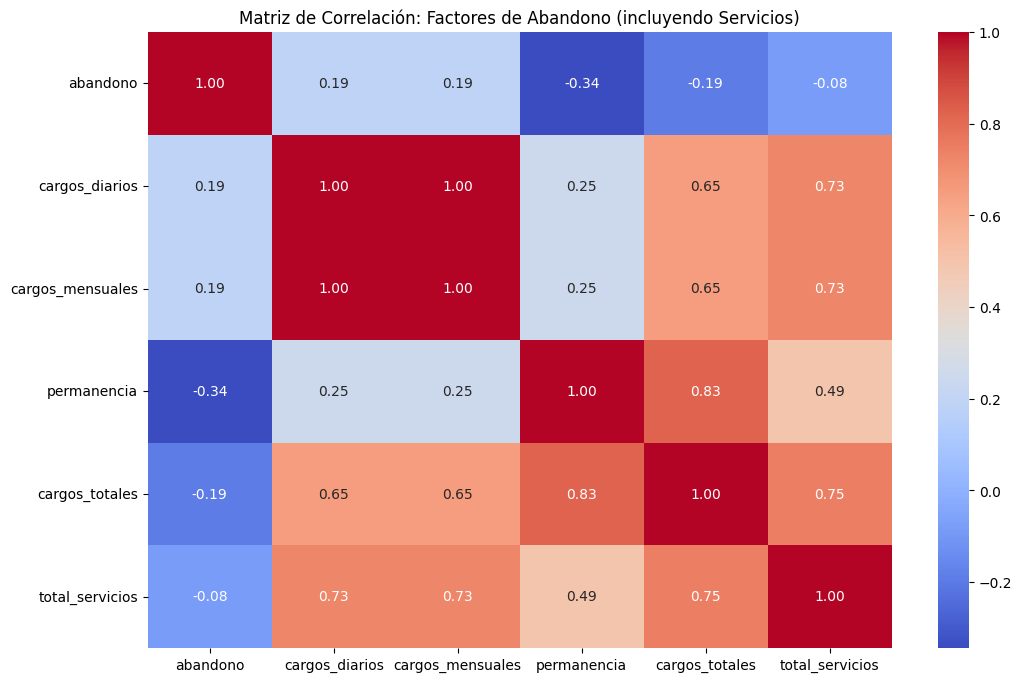

In [235]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calculo de total_servicios
service_columns_for_count = [
    'seguridad_online', 'respaldo_online', 'proteccion_dispositivo',
    'soporte_tecnico', 'streaming_tv', 'streaming_peliculas'
]

df_copy['total_servicios'] = df_copy[service_columns_for_count].sum(axis=1)

# 2. Correlacion Matrix
cols_analisis_corr = ['abandono', 'cargos_diarios', 'cargos_mensuales', 'permanencia', 'cargos_totales', 'total_servicios']
matriz_corr = df_copy[cols_analisis_corr].corr()

# 3. Visualización con Heatmap
plt.figure(figsize=(12, 8)) # Adjusted figure size for more columns
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación: Factores de Abandono (incluyendo Servicios)')
plt.show()





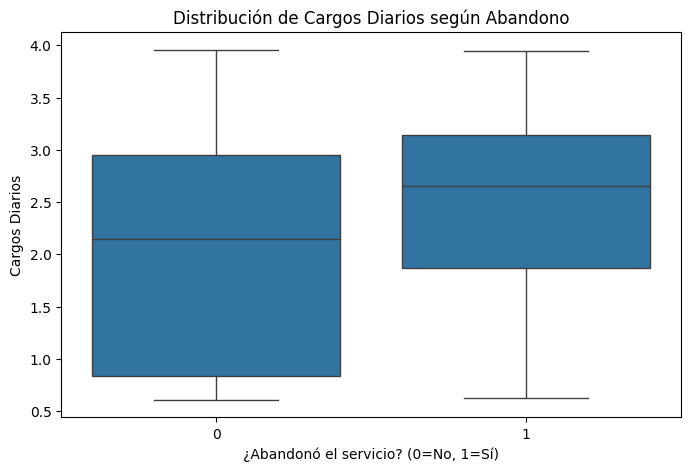

In [236]:

# 4. Visualización específica: Cargos Diarios vs Abandono
plt.figure(figsize=(8, 5))

sns.boxplot(x='abandono', y='cargos_diarios', data=df_copy)
plt.title('Distribución de Cargos Diarios según Abandono')
plt.xlabel('¿Abandonó el servicio? (0=No, 1=Sí)')
plt.ylabel('Cargos Diarios')
plt.show()

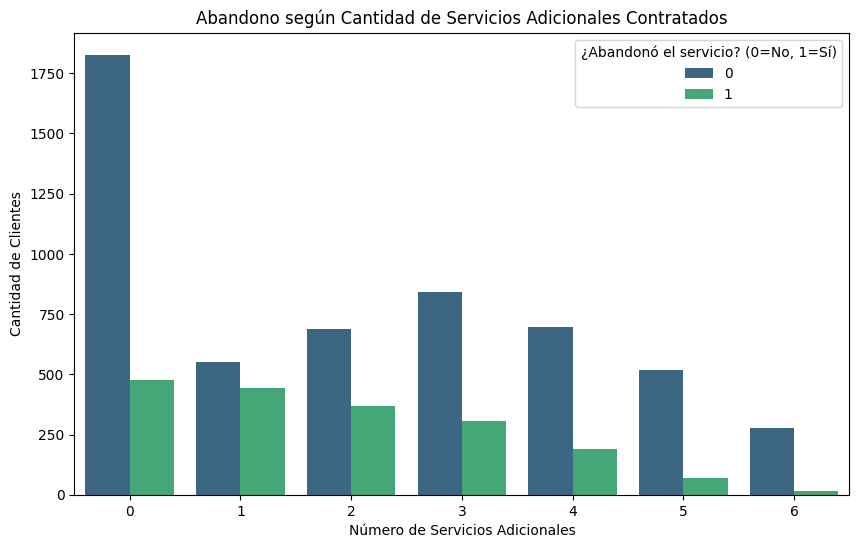

In [237]:
# 5. Relación entre cantidad de servicios y abandono
plt.figure(figsize=(10, 6))
sns.countplot(x='total_servicios', hue='abandono', data=df_copy, palette='viridis')
plt.title('Abandono según Cantidad de Servicios Adicionales Contratados')
plt.xlabel('Número de Servicios Adicionales')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='¿Abandonó el servicio? (0=No, 1=Sí)')
plt.show()

#Matriz de Correlación: Factores de Abandono (incluyendo Servicios)
**Permanencia y Cargos Totales:** Existe una fuerte correlación positiva entre la permanencia del cliente y los cargos_totales (0.83). Esto es lógico, ya que cuanto más tiempo permanece un cliente, más cargos acumula.

**Abandono y Permanencia:** Se observa una correlación negativa moderada entre el abandono y la permanencia (-0.34). Esto confirma que los clientes con mayor permanencia son menos propensos a abandonar, y viceversa.

**Abandono y Cargos:** El abandono tiene una correlación positiva débil con los cargos_diarios (0.19) y cargos_mensuales (0.19). Esto sugiere que, aunque no es el factor más fuerte, clientes con cargos más altos podrían tener una ligera tendencia a abandonar, aunque es crucial analizar esto con más detalle para entender la causalidad.

**Abandono y Servicios Totales:** Hay una correlación negativa débil entre el abandono y la total_servicios (-0.29). Esto podría indicar que los clientes con más servicios adicionales tienden a ser más leales, pero la relación no es muy fuerte.

### Distribución de Cargos Diarios según Abandono
El boxplot muestra que, en promedio, los clientes que no abandonan (0) tienen cargos_diarios ligeramente más bajos que los clientes que sí abandonan (1). Sin embargo, la dispersión de los datos es bastante similar en ambos grupos, y la diferencia en la mediana no es drástica. Esto complementa la correlación débil observada, sugiriendo que, si bien los cargos diarios son un factor, no es el más determinante por sí solo.

### Abandono según Cantidad de Servicios Adicionales Contratados
Este gráfico revela cómo la cantidad de servicios adicionales contratados se relaciona con el abandono. Se puede observar una tendencia general donde los clientes con menos servicios adicionales (0, 1 o 2) muestran una proporción de abandono (Sí) relativamente más alta. A medida que el número de servicios adicionales contratados aumenta, la proporción de clientes que no abandonan (No) tiende a ser mayor, especialmente en clientes con 4 o más servicios. Esto sugiere que tener múltiples servicios podría ser un factor de fidelización.


 #### ***Estos análisis nos proporcionan una visión más profunda de las relaciones entre las variables numéricas y el abandono, lo que es muy útil para futuros modelos predictivos.***